<a href="https://colab.research.google.com/github/vihaankrishna100/AI-Neural-Networks/blob/main/CNNModel_CFAR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A CNN is a type of network used to classify spatial data, for instances, images, and sequences. A CNN uses a kernel or feature detects, and detects features in an image. A combination of these images is then used to create a larger image and then can be classified using a densely connected neural network.

Steps for Image Classification using CNN

1. Convulution Operation

- Image and feature detector
- Moves left to right on an image and each layer of the convulution operation finds features in the image

2. ReLu Operation
- Rectified Linear Unit(this is a activation function used in neural networks)
- Need to run it on the feature map
-All Negative values changed to 0
3. Pooling Operation
- Can identify object in image even with distortion
4. Flattening and Fully Connected Layer

- Flattened into a vector


In [ ]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.models import Model


2.18.0


In [ ]:
# importing mnist datase
df = tf.keras.datasets.cifar10
#dividing data into training and test sets
(training_images, training_labels), (test_images, test_labels) = df.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
training_images, test_images = training_images/255.0, test_images/255.0
print(training_images.shape)




(50000, 32, 32, 3)


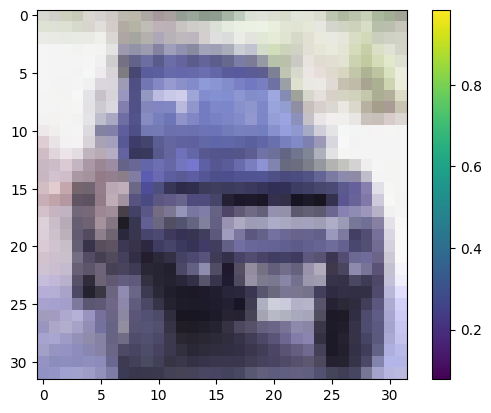

In [ ]:
plt.figure()
plt.imshow(test_images[9])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:


print(training_images.shape)

(50000, 32, 32, 3)


In [ ]:
output_classes = len(set(training_labels.flatten()))
print("Number of output classes is: ", output_classes)

Number of output classes is:  10


In [ ]:
training_images[0].shape

(32, 32, 3)

In [ ]:
input_layer = Input(shape = training_images[0].shape )
conv1 = Conv2D(32, (3,3), strides = 2, activation= 'relu') (input_layer)
maxpool1 = MaxPool2D(2, 2)(conv1)
conv2 = Conv2D(64, (3,3), strides = 2, activation= 'relu') (maxpool1)
flat1 = Flatten()(conv2)
drop1 = Dropout(0.2)(flat1)
dense1 = Dense(512, activation = 'relu')(drop1)
drop2 = Dropout(0.2)(dense1)
output_layer = Dense(output_classes, activation= 'softmax')(drop2)
model = Model(input_layer, output_layer)


In [ ]:
model.compile(optimizer = 'adam', loss=
'sparse_categorical_crossentropy', metrics =['accuracy'])
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png',
show_shapes=True, show_layer_names=True)
#training the CNN model
model_history = model.fit(training_images,
training_labels, epochs=20, validation_data=(test_images,
test_labels), verbose=1)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.3582 - loss: 1.7457 - val_accuracy: 0.5322 - val_loss: 1.2990
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.5292 - loss: 1.3179 - val_accuracy: 0.5832 - val_loss: 1.1743
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.5795 - loss: 1.1829 - val_accuracy: 0.6097 - val_loss: 1.1076
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.6149 - loss: 1.0857 - val_accuracy: 0.6373 - val_loss: 1.0326
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6448 - loss: 1.0068 - val_accuracy: 0.6595 - val_loss: 0.9828
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.6680 - loss: 0.9432 - val_accuracy: 0.6644 - val_loss: 0.9590
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6879 - loss: 0.8848 - val_accuracy: 0.6771 - val_loss: 0.9409
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.7051 -

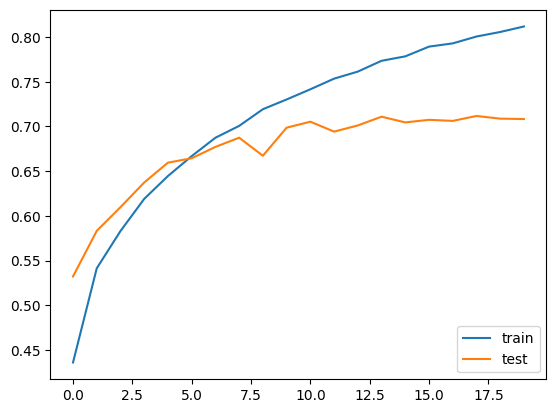

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.legend(['train','test'], loc='lower right')

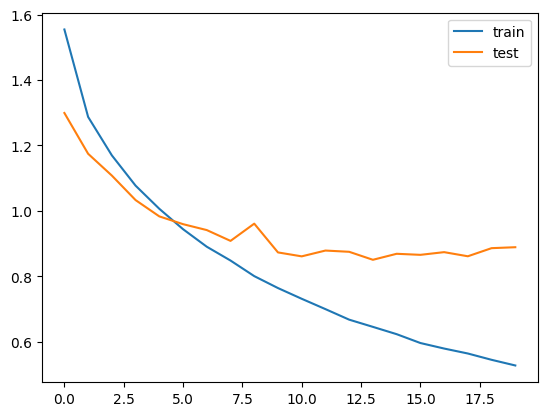

In [ ]:
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper right')

In [ ]:
output = model.predict(test_images)
my_image = training_labels[100]
prediction = np.argmax(output[100])
print(prediction)
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


NameError: name 'training_label' is not defined